In [2]:
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('./Data Collection/Combined_df.csv', index_col = 'county')
jack = pd.read_csv('./Data Collection/Jacks_df.csv', index_col = 'county_name')
jack.drop(columns = 'Unnamed: 0', inplace = True)


In [7]:
jack.head()

,2012_unemp,2016_unemp,2020_unemp,2012_var_state,2016_var_state,2020_var_state,median_income_2012_2016_16_dollars,median_income_2020_16_dollars
county_name,,,,,,,,
Anderson,0.036,0.043,0.056,-0.029,-0.005,-0.012,42146,44871
Andrews,0.031,0.047,0.082,-0.034,-0.001,0.014,70121,69369
Angelina,0.051,0.059,0.076,-0.014,0.011,0.008,44185,47917
Aransas,0.068,0.056,0.085,0.003,0.008,0.017,44851,49153
Archer,0.034,0.043,0.053,-0.031,-0.005,-0.015,62407,59010


In [5]:
df['total_2020']

county
anderson county    58199
andrews county     22269
angelina county    90437
aransas county     27699
archer county       8344
                   ...  
wood county        45292
yoakum county       9225
young county       18712
zapata county      14409
zavala county      12682
Name: total_2020, Length: 254, dtype: int64

In [8]:
jack.head()

,2012_unemp,2016_unemp,2020_unemp,2012_var_state,2016_var_state,2020_var_state,median_income_2012_2016_16_dollars,median_income_2020_16_dollars
county_name,,,,,,,,
Anderson,0.036,0.043,0.056,-0.029,-0.005,-0.012,42146,44871
Andrews,0.031,0.047,0.082,-0.034,-0.001,0.014,70121,69369
Angelina,0.051,0.059,0.076,-0.014,0.011,0.008,44185,47917
Aransas,0.068,0.056,0.085,0.003,0.008,0.017,44851,49153
Archer,0.034,0.043,0.053,-0.031,-0.005,-0.015,62407,59010


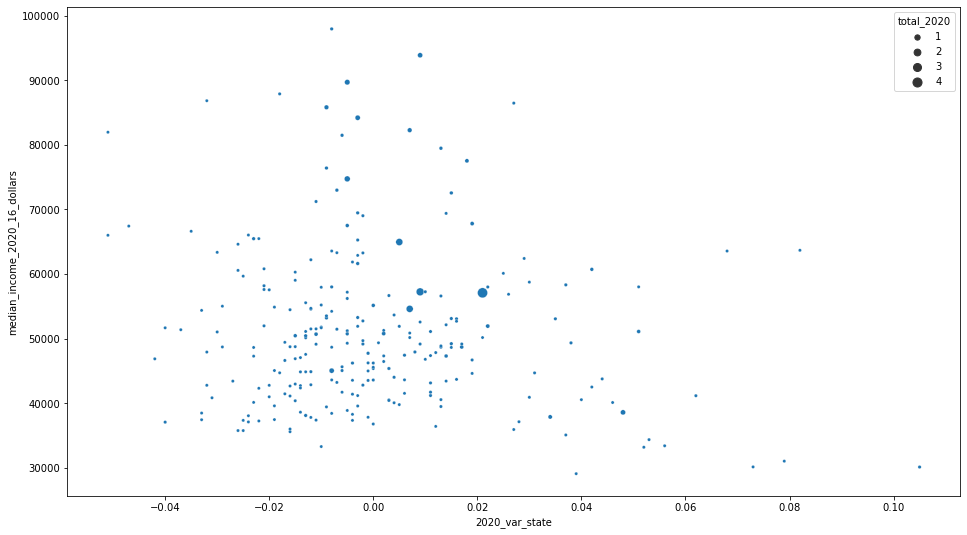

In [36]:
from matplotlib import pyplot

w = pyplot.subplots(figsize=(16,9));
sns.scatterplot(x='2020_var_state', y='median_income_2020_16_dollars', data=df, size = df['total_2020'], sizes = (10,100));

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZkAAAEHCAYAAAB8yTv9AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAABW9klEQVR4nO3dd3zU9f3A8dc7O4EEMhiBsPfeCIII4kAcOAvu1VqpdXS42p9aba2rbutqtYITnOBApghFtmwQCBDIIpskhMzL+/fHfUMzLsnd5S6X8Xk+Hve4y+e+451A7pPPen9EVTEMwzAMb/DzdQCGYRhGy2UqGcMwDMNrTCVjGIZheI2pZAzDMAyvMZWMYRiG4TUBvg6gKYmJidGePXv6OgzDMIxmZevWrZmq2sHRe16tZETkHeBiIF1Vh1plUcACoCeQAPxCVXOs9x4CbgNswN2qutQqHwO8C4QC3wL3qKqKSDAwHxgDZAGzVTXBOucm4P+sUP6mqvPqi7dnz55s2bKlwd+3YRhGayIiR2t7z9vdZe8CM6qVPQisVNV+wErra0RkMDAHGGKd85qI+FvnvA7cDvSzHhXXvA3IUdW+wAvA09a1ooBHgTOA8cCjIhLphe/PMAzDqINXKxlVXQNkVyueBVS0KuYBl1Uq/1hVi1X1CBAPjBeRWCBCVderfeXo/GrnVFzrU2C6iAhwAbBcVbOtVtJyalZ2hmEYhpf5YuC/k6qmAljPHa3yrkBipeOSrLKu1uvq5VXOUdUyIBeIruNaNYjI7SKyRUS2ZGRkNODbMgzDMKprSgP/4qBM6yh395yqhapvAW8BjB071uTYMQzDaaWlpSQlJVFUVOTrUBpFSEgIcXFxBAYGOn2OLyqZNBGJVdVUqyss3SpPArpVOi4OSLHK4xyUVz4nSUQCgHbYu+eSgKnVzlnt2W/DMIzWLikpifDwcHr27Im9p77lUlWysrJISkqiV69eTp/ni+6yxcBN1uubgEWVyueISLCI9MI+wL/J6lLLF5EJ1njLjdXOqbjWVcAqa9xmKXC+iERaA/7nW2WGYRgeU1RURHR0dIuvYABEhOjoaJdbbd6ewvwR9hZFjIgkYZ/x9RSwUERuA44BVwOo6h4RWQjsBcqAO1XVZl1qLv+bwrzEegC8DbwnIvHYWzBzrGtli8hfgc3WcY+ravUJCIZhGA3WGiqYCu58r16tZFT1mlreml7L8U8ATzgo3wIMdVBehFVJOXjvHeAdp4M1moytCdm8v/EYv5zciyFd2/k6HMMwGsCklTGanNUHM/hiWzLrDmX5OhTDMBrIVDJGk3PzxJ68OHsEc8Z1q/9gw2hCTpw4wWuvvVbnMQkJCXz44Yf1XishIYGhQ2t04Jy2fPlyxowZw7BhwxgzZgyrVq06/d7WrVsZNmwYffv25e6776Zic8rnn3+ewYMHM3z4cKZPn87Ro/9bqD9v3jz69etHv379mDev3gQpTjOVjNHkRLcN5rJRcUSEOj9N0jCaAk9WMvWJiYnhq6++YteuXcybN48bbrjh9Htz587lrbfe4uDBgxw8eJDvvvsOgFGjRrFlyxZ27tzJVVddxf333w9AdnY2jz32GBs3bmTTpk089thj5OTkNDhGMJWMYRiGxzz44IMcOnSIkSNHct9993HfffcxdOhQhg0bxoIFC04fs3btWkaOHMkLL7xAQkICZ511FqNHj2b06NH8+OOPTt1r1KhRdOnSBYAhQ4ZQVFREcXExqamp5OXlMXHiRESEG2+8kS+//BKAadOmERYWBsCECRNISrKvc1+6dCnnnXceUVFRREZGct55552umBqqKS3GNAzDaNaeeuopdu/ezfbt2/nss89444032LFjB5mZmYwbN44pU6bw1FNP8Y9//IOvv/4agFOnTrF8+XJCQkI4ePAg11xzjcuJej/77DNGjRpFcHAwycnJxMX9b2lhXFwcycnJNc55++23ufDCCwFITk6mW7du9Z7jDlPJGIZheMF///tfrrnmGvz9/enUqRNnn302mzdvJiIiospxpaWl/Pa3v2X79u34+/tz4MABl+6zZ88eHnjgAZYtWwZwevylsupTj99//322bNnCDz/84PQ57jLdZYZhGF7g6IPbkRdeeIFOnTqxY8cOtmzZQklJidP3SEpK4vLLL2f+/Pn06dMHsLdCKrrBKo6p6FYDWLFiBU888QSLFy8mODj49DmJiYm1ntMQppIxDMPwkPDwcPLz8wGYMmUKCxYswGazkZGRwZo1axg/fnyVYwByc3OJjY3Fz8+P9957D5vNVtvlqzhx4gQXXXQRTz75JJMmTTpdHhsbS3h4OBs2bEBVmT9/PrNmzQJg27Zt/PrXv2bx4sV07Njx9DkXXHABy5YtIycnh5ycHJYtW8YFF1zgiR+J6S4zDMPwlOjoaCZNmsTQoUO58MILGT58OCNGjEBEeOaZZ+jcuTPR0dEEBAQwYsQIbr75Zn7zm99w5ZVX8sknnzBt2jTatGnj1L1effVV4uPj+etf/8pf//pXAJYtW0bHjh15/fXXufnmmyksLOTCCy88PfZy3333cfLkSa6+2r6GvXv37ixevJioqCgefvhhxo0bB8AjjzxCVFSUR34m4myTrjUYO3asmp0xDQBbuZKRX0S70CBCg/zrP8Folfbt28egQYN8HUajcvQ9i8hWVR3r6HjTkjGMavIKS/n9wu2s2JdO75gwXrlmtElvYxhuMmMyhlHN4u3JrNhn34HicOYp3lp72McRGa3Z0qVLGTlyZJXH5Zdf7uuwnGZaMoZRTVm1LuQyW7mPIjEM+6C8pwbhfcG0ZAyjmouHd2Fcz0gAOkUEc8sk5zdoMgyjKtOSMYxqYtoGM//WMziaVUDHiGCi2gT7OiTDaLZMJWMYDoQG+TMwNqL+Aw3DqJPpLjMMw2jhbr31Vjp27Fjn1gHeYioZwzCMFu7mm2/2WFZlV5lKxjAMo4nZt28fS5cuZd++fR653pQpUzy2gt9VTo/JiEgboFBVy0WkPzAQWKKqpV6LzjAMo5V55ZVXWLBgAX5+fpSXlzN79mzuuusuX4flNldaMmuAEBHpCqwEbgHedffGInKPiOwWkT0icq9VFiUiy0XkoPUcWen4h0QkXkT2i8gFlcrHiMgu672XxcpPLSLBIrLAKt8oIj3djdUwDKMx7Nu3jwULFlBUVMSpU6coKipiwYIFHmvR+IIrlYyo6ingCuAVVb0cGOzOTUVkKPArYDwwArhYRPoBDwIrVbUf9orsQev4wcAcYAgwA3hNRCoSSr0O3A70sx4zrPLbgBxV7Qu8ADztTqxG07E3JZfV+9NJzyvydSiG4RXHjh3Dz6/qx7Kfnx/Hjh3zUUQN51IlIyITgeuAb6wyd6dADwI2qOopVS0DfgAuB2YB86xj5gGXWa9nAR+rarGqHgHigfEiEgtEqOp6tWf6nF/tnIprfQpMr2jlGM3Px5uOcfEr/+Xm/2zmytd/5GBafv0nGUYz0717d8rLq2aYKC8vp3v37j6KqOFcqWTuAR4CvlDVPSLSG/jezfvuBqaISLSIhAEzgW5AJ1VNBbCeKzY86AokVjo/ySrrar2uXl7lHKsiywWiqwciIreLyBYR2ZKRkeHmt2N4U0lZOU999zPlVraXxJxCPtrUfP+yM4zaDBo0iNmzZxMSEkJYWBghISHMnj27wZmer7nmGiZOnMj+/fuJi4vj7bff9lDE9XOqJWJ1TV2iqpdWlKnqYeBud26qqvtE5GlgOXAS2AGU1RWCo8vUUV7XOdVjeQt4C+yp/uuIwfCRctUa+cNsZosKo4W66667OPfcczl27Bjdu3f3yFYCH330kQcic49TLRlVtQFjPHljVX1bVUer6hQgGzgIpFldYFjP6dbhSdhbOhXigBSrPM5BeZVzRCQAaGfdx2hmQgL9uWd6v9NfR7cN4qrRcXWcYRjN26BBg7jgggtaxF41roypbBORxcAnQEFFoap+7s6NRaSjqqaLSHfskwkmAr2Am4CnrOdF1uGLgQ9F5HmgC/YB/k2qahORfBGZAGwEbgReqXTOTcB64CpglZod2pqtX03pw7C4dhzPK2ZkXDt6xrT1dUiGYTjBlUomCsgCzqlUpoBblQzwmYhEA6XAnaqaIyJPAQtF5DbgGHA1gDUGtBDYi71b7U6rdQUwF/tU6lBgifUAeBt4T0Tisbdg5rgZp9FETOgd4+sQDMNwkdOVjKre4skbq+pZDsqygOm1HP8E8ISD8i1AjYQ8qlqEVUkZ3vfP7+NpGxzATWf29HUohmE0Ia6s+A/BvvZkCBBSUa6qt3ohLqMZUVUWbU8mtl2oqWQMw6jCle6y94CfgQuAx7Gvl2m+y1ANjxERPvzVGfiLSYVnGEZVrnwq9FXVh4ECVZ0HXAQM805YRkMVldp4/ft4jmScbJT7xbQNIbJNUKPcyzAM1yQmJjJt2jQGDRrEkCFDeOmllxrt3q5UMhWJME9YaWHaAT09HpHhEZn5xfxzdTy7knN9HYrRQCVl5by+Op6NR7J8HYrRSDIzM9mxYweZmZkeuV5AQADPPfcc+/btY8OGDfzzn/9k7969Hrl2vfd24di3rISVD2OfHtwWeMQrURkNFhcVxroHz6FdaPNpXXyzM5V18RmM7xXFZaPMOpgKqbmneHbpfm6c2IMzetVIWmG0IIWFhTzyyCOsW7eOoKAgSkpKmDRpEo8//jihoaFuXzc2NpbY2FgAwsPDGTRoEMnJyQwe7Fb6SZe4Mrvs39bLH4De3gnH8KTmVMHsTDzBXR/9RLnCR5sT6do+jHG9fLP/RVPTI7oti387iS7t3P+QMZqHigqmpKSEkpISANatW8cjjzzCs88+65F7JCQksG3bNs444wyPXK8+9VYyIvL7ut5X1ec9F47RWmUVFJ/OTaYK2QUlvg2oiRnatb2vQzC8LDMz83QFU1lJSQnr1q0jMzOTmJiGrRU7efIkV155JS+++CIRERENupaznBmTCa/nYRgNNrFPDFePiSM4wI/LRnZhSv8Ovg7JMBpVcnIyQUGOex+CgoJISUlx+J6zSktLufLKK7nuuuu44oorGnQtV9TbklHVxxojEKN1Cwn059mrR/DXy4YSEuhf/wnAuvhMsgtKmNA7ig7hIfWfYBhNWNeuXWu0YiqUlJTQpUsXt6+tqtx2220MGjSI3/++zs4pj3Omu+zlut5XVbcyMRuGI85WMG+sPsRT3/0MwIBO4cy/bRydIsyYhdF8xcTEMGnSpBpdZkFBQUyaNKlBXWXr1q3jvffeY9iwYYwcORKAv//978ycObOhYdfLmYH/rV6PwjBcUF6uvLPuyOmv96fls+ZAJleP7VbHWYbR9D3++OM1ZpdNnjyZxx5rWIfS5MmT8VV+YGe6y+ZV/lpEwu3F2jir/AyjGj8/oUN4MOn5xafL2oUE+jAiw/CM0NBQnn32WTIzM0lJSaFLly4NHuz3NacXY4rIUBHZhn1Xy70islVEhngvNMOo3SMXD6ZXdBjBAX786qxeTB/cydchGYbHxMTEMHz48GZfwYCLizGB36vq9wAiMhX4F3Cm58MyjLqd0TuaFX+YSkmZjdAgV/4bG4bRmFz57WxTUcEAqOpqEWnjhZgMwyn+fuKxCuZIxkm+23OcuMhQLh7eBRFHu3cbhuEqV35DD4vIw9izMQNcDxyp43jDaBZOFpVy2/wtHM6wb/haXFbOVWPMJALD8ARXEmTeCnTAvhPmF9Zrj25k1lzlF5Xy5g+HSDlxytehGG7IKig+XcEAHEjL92E0htGyOF3JqGqOqt6tqqNVdZSq3qOqOd4MrrlIzinkueX7+fm4mXDnDXuSc3nzh0Nkniyu/2A3dG0fxmUj7QvdIsMCOX9wZ6/cxzB8paioiPHjxzNixAiGDBnCo48+2mj3dmYx5ldArROsVfVSj0bUDA2MjWDjQ9OJbBPs61BapJdXHWTpnjQAfn12H49fP8Dfj2euGsEtk3rRMTyY2PZmUafhG2VlZSxatIgPP/zwdK6ya6+9llmzZhEQ4P74Y3BwMKtWraJt27aUlpYyefJkLrzwQiZMmODB6B1zJup/WM9XAJ2B962vrwESvBBTs2QqGO+xD8TDpL7em84ZFODHiG7tvXZ9w6hPWVkZv/3tb9m9ezdFRUUAFBQU8MILL7B8+XJeffVVtysaEaFt27aAPYdZaWlpo01uqbe7TFV/UNUfgFGqOltVv7Ie1wKT3b2xiPxORPaIyG4R+UhEQkQkSkSWi8hB6zmy0vEPiUi8iOwXkQsqlY8RkV3Wey+L9ZMTkWARWWCVbxSRnu7GavjWJSO68Mb1YxnatZ2vQzEMr1m0aFGVCqZCUVERu3fvZtGiRQ26vs1mY+TIkXTs2JHzzjuv0VL9uzLw30FETu8jIyK9sA/+u0xEugJ3A2NVdSjgD8wBHgRWqmo/YKX1NSIy2Hp/CDADeE1EKpJcvQ7cDvSzHjOs8tuAHFXtC7wAPO1OrIZhGI3hww8/rFHBVCgqKuLDDz9s0PX9/f3Zvn07SUlJbNq0id27dzfoes5ypZL5HbBaRFaLyGrge+CeBtw7AAgVkQAgDEgBZgEVaWzmAZdZr2cBH6tqsaoeAeKB8SISC0So6nq1J+aZX+2cimt9CkyvaOUYhmE0NfVtteyprZjbt2/P1KlT+e677zxyvfq4MrvsO+wthXusxwBVXVbxvoic58K1krGP9RwDUoFc61qdVDXVOiYV6Gid0hVIrHSJJKusq/W6enmVc1S1DMgFauxdKyK3i8gWEdmSkZHh7LdgtHKf/5TEnLfW8/3+NF+HYrQQ9aWQaUiKmYyMDE6cOAHYt3hesWIFAwcOdPt6rnClJYPVkthhParPJ3W6O8oaa5kF9AK6AG1E5Pq6TnEUTh3ldZ1TtUD1LVUdq6pjO3QwG2UZzlmy6zgbDmezYm+6r0MxWohrr72WkBDH+yKFhIRw7bXXun3t1NRUpk2bxvDhwxk3bhznnXceF198sdvXc4Unkz650hV1LnBEVTMARORz7DnQ0kQkVlVTra6wit/gJKDyEuw47N1rSdbr6uWVz0myuuTaAdmufUuG4djcqX3oFRNmthcwPGbWrFksX768xuB/SEgIQ4cOZdasWW5fe/jw4Wzbts0TYbrMk5WMK5sVHAMmiEgYUAhMB7YABcBNwFPWc8V0isXAhyLyPPaWTz9gk6raRCRfRCYAG4EbgVcqnXMTsB64ClilvtpQwWhxRveIZHSPyPoPNAwnBQQE8Oqrr3plnYwv+SRqVd0oIp8CPwFlwDbsWZ7bAgtF5DbsFdHV1vF7RGQhsNc6/k5VtVmXmwu8C4QCS6wHwNvAeyISj70FM6cRvjXDMAy3BQQEcOWVV3LllVf6OhSP8WQlk+DKwar6KFA9t0Ex9laNo+OfAJ5wUL4FGOqgvAirkjIMX/nipySScgqZPb4bHcMd97cbRkvmTFqZ7kC6qhZZU4BvBkZjb1X8y5q5hape4c1ADaO5WRefye8W7gAgNbeIv18xzMcRGUbjc2Z22beVjnsKuAj7+Mc47F1chmE44F/ptyvAzyzRMlonZ7rL/FS1Iof9ucA4VS0H3heRHd4LzTCatwm9Y3jt2lEk5hRy1Zi4+k8wjBbImUomUUTOUdVV2MddugFHRaTGwkbDaIhvd6bw929/5o/n9+ey0S3jQ3nm8C6+DsFoZvLy8li1atXp2WXnnHMOERERHrm2zWZj7NixdO3ala+//toj16yPM5XML4H5IvIX7Kvmt4vINiAS+L0XYzNamfiMkySdKORAmtmXx2h9VJU33niD9957D39/f4qKiggJCeGZZ57hhhtu4I477mhw5uSXXnqJQYMGkZeX56Go61dvJaOqicA0ERkE9Mc+XTgJ2Gx1mxmGR/zyrN4M69qesT3N+hOj9XnjjTf44IMPKCkpOV1WWFgIwAcffADA3Llz3b5+UlIS33zzDX/+8595/vnnGxasC5yewqyq+4B9XozFaOXCggKYNrCjw/fyTpXy5Y5kkrJPMbFPTK3HGUZzlJeXx3vvvVelgqmsqKiI9957j+uvv57w8HC37nHvvffyzDPPkJ/fuNuLu5S7rDoR2eWpQAyjNrZy5Z4F23hk0R7eWnuEW97dzEebjvk6LMPwmFWrVuHv71/nMf7+/qxcudKt63/99dd07NiRMWPGuHV+QzizTqa29S+CfadMw/CqHYk5fL+/aobsBZsTuWZ8dx9FZBielZmZWeteMhWKiorcTve/bt06Fi9ezLfffktRURF5eXlcf/31vP/++/Wf3EDOdJctAD7AcW4ys4TZMAyjgWJiYggJCTk9BuNISEiI2+n+n3zySZ588kkAVq9ezT/+8Y9GqWDAue6yncA/VPWW6g/ghHfDMwwY2S2Sc6qNwZhWjNGSnHPOOdhstjqPsdlsTJ/uMOtWk+ZMS+ZeoLb5bpd7LhTDcMzPT3jxFyNZvDOZxOxCJvaJZuoAM/BvtBwRERHccMMNfPDBBw67zUJCQrjuuuvcHvSvbOrUqUydOrXB13GWM1OY19bx3paK1yLykKo+6anADKOo1MbRrFP079SWiLBArp/Q09chGYbX3HHHHQA11snYbDauu+660+83N57Mwnw1YCoZw2OeXvIz//kxgb9cMpibJ/XydTj1UtUGL5YzWi8RYe7cuVx33XVVVvxPnz7dIy0YX/HVzpiGUa+ycq3y3JS9uPwAH20+xrNXDmeK6cprVTz9x0VERASXXXaZx67nSe7s++irnTENo14PzRzI1WPjGNKlna9DqdeWo9mk5RWzJzXPVDKtSEhICFlZWURHR7f4VqyqkpWVRUiIa5OKTUvGaLLCggIYHtfe12E45eGLB7P16AkuHh7r61CMRhQXF0dSUhIZGRn1H9wChISEEBfnWvJaT1Yyn3jwWobRrAzoHMGAzp7JlGs0H4GBgfTq1fTHC33JqbQyInKBiLwuIotFZJH1ekblY1T1794J0WipDqTlMfvN9Xy3O9XXoRiG4SX1VjIi8iJwD/AD8AzwrPX6bhF5yZ2bisgAEdle6ZEnIveKSJSILBeRg9ZzZKVzHhKReBHZLyIXVCofIyK7rPdetraIRkSCRWSBVb5RRHq6E6vhPcWl5RxIy6eguMzXoRiG4SVS32wBETmgqv0dlAtwQFX7NSgAEX8gGTgDuBPIVtWnRORBIFJVHxCRwcBHwHigC7AC6K+qNhHZhL0S3IB9q+iXVXWJiPwGGK6qd4jIHOByVZ1dVyxjx47VLVu21HWI4WElZeUEBTQoT6thGD4mIltVdayj95z57S4SkfEOyscBdWd0c8504JCqHgVmAfOs8nnAZdbrWcDHqlqsqkeAeGC8iMQCEaq6Xu215fxq51Rc61NgekUrx2g6TAVjGC2bMwP/NwOvi0g49s3KwL4Fc571XkPNwd5KAeikqqkAqpoqIhVzQbtib6lUSLLKSivFVLm84pxE61plIpILRAPupTE1mhxVpcRWTnBA3SnSDcPwHWfSyvwEnCEinbF/cAuQpKrHG3pzEQkCLgUequ9QR6HVUV7XOdVjuB24HaB7d5N0sTl5dPEelu45zvxbx/tsZtex7FN8t/s4157RnbbBnpysaRgtgyt9FVmqulVVt1RUMCLiXt7p/7kQ+ElV06yv06wuMKzndKs8CXvrqUIckGKVxzkor3KOiAQA7YDs6gGo6luqOlZVx3bo0KGB347RmFJPFJKRX8ymhCze/CGeMlvj7wb+34MZ/P3bfRxMa9zdBg2juXBmdtk0EUkCUkRkWbVZWssaeP9r+F9XGcBi4Cbr9U3Aokrlc6wZY72AfsAmq2stX0QmWOMtN1Y7p+JaVwGr1J2cCEaT9cxVI1h67xR+jM/m6e/2k5bniSFC11w1phtL7jmLUd0j6z/YMFohZ2aXbQZuVtU9InIV9iSYN6jqBhHZpqqj3LqxSBj2MZPeqpprlUUDC4HuwDHgalXNtt77M3ArUAbcq6pLrPKxwLtAKLAEuEtVVURCgPeAUdhbMHNU9XBdMZnZZc1TYvYp0vKKGNszytehGEarVNfsMmcqmR2qOqLS10OAz4EHgYdVdbQng/UlU8kY3mArV/6z7ggZ+cXcOrknnSJCfR2SYXhUXZWMMyOVpSLSuWIcxmrRTAe+Bvp4ME7DqNOa/elsPprDnHHd6BoZ5utwnLZ6fzp/+2YfYK9w/u/iwT6OyDAajzMD/w8CnSoXqGoSMBV4ygsxtTjrD2Vy0zsbSc2tff9uo26ltnJ+t3AHr6yK5z8/Jvg6HJdEhgXi72ef7BjdNsjH0RhG43JmCvOKWspPAE94OqCWyM9PCA3yx9+sBXVboL8fU/p34KsdKYxoJpmZK4zuEcWC2yeQkV/MuYM71X+CYbQgzozJtMO+juUyoGKObzr2WVxPWZVNi9Bcx2Q+2XKMgZ3bMSyu6e+70hDl5crJ4jIiQgN9HYphGJU0NK3MQiAHmKqq0aoaDUyzykx6fx8rKrXx3LKDrN6fXv/BzZyfn5gKxjCaGWcqmZ6q+nTlFf6qelxVn8Y+1bjVS8sr5I+fbOfn1LxGv3dIoD/f3jOZX5/t2TkYi3ekcPv8LS02Q3JxmY3tx3KITzvp61AMo0VzZnbZURG5H5hXsTJfRDphz1uW6MXYmo2i0nISsws56aMP5Kg2wR6/ZmigHxEhgfwYn8nhzAIuHNqZUyU2BsY2/4251h7I4PGv93AwvQCAmUM788glg+nczkwtNgxPc2ZMJhL7DLNZQEXCyjTsK+qfrlgs2RI01zEZbzr3udXEZxRwyYhYth87wZr7pzWZvcw/2nSMHw9l8vilQ4ls49ysrfS8Ii54YQ05haVVyq8Y3ZXnfzHSC1EaRsvXoHUyqpoDPGA9jFbmV1P6sDv5BL8YG0dhqTaZCgZgT3IuK/el84fzSpyuZFYfyKhRwQAs2p7CgzMG0jEixNNhGkar5lTaWBEZiJVuX1ULKpXPUNXvvBWc0Xg2Hs7iw03HePSSwVW632aP68bscd3qONN3/nTRIH4zrS9d2jvfzVVaSxJNW7lSZjOp7QzD05xJkHk39unKdwF7RGRWpbf/7q3AjMZ1qtRG5sniZvVBGxYU4FIFAzC5bwxBATVbY9MHdaRLpBmTMQxPc6Yl8ytgjKqetDIwfyoiPVX1JRzv2WI0Q9MGdGTagI71H9jM9Yhuw1NXDOfRRXvItyZqDOkSwQMzBvg4MqOlKCq1UVauZn8hizM/BX9VPQmgqgkiMhV7RdMDU8k0KwfT8unToS1+fk37n+1gWj6vrjrIHy8YSKeIEKe2aLaV6+nULfW5YnQck/vGsDkhm7bBAUzoE21212zBikpt/OWrPZw3qBPTB3k/48JfFu8hLa+I/9ziaNf61seZdTLHRWRkxRdWhXMxEAMM81JchodtPJLFeS+sYemeBm9o6nVFZTbS80vYdCSLCX9fQXx63RuCvbD8AJe+utalNT0dI0K4aHgXzh7Q0VQwLVxZuZJ6oohcBxM+vOG8wZ24ZESXRrlXc+DMFOY4oMzRdssiMklV11mvI62ZaM1WS57CnFdUymdbk7h4eCwdwpvHDKqErAIWbkrk9im9ae9g9tiX25JZ+XMaZ/XtwJajOfz1siGmwjAMH2joFOakOt5bV+nLlUCL2VumpYkICeSWSb18HYZLeka34f4LB9b6vqqi5cqlI7vwiyY6A84bymzlfLk9hTP7RNGlffPZ8sBonZzpLnNW0+7oN5qMlJxCLnnlv3y9M6VB17l8dByvXjeGkMDW1XpJPlHIA5/t5Pv9Gb4OxTDq5cnpD81n7qvhU0EBQtf2oW7PvlmyK4VPf0rmF2O7ceB4Pjed2bNVJc7sEd2GZb+bQrdmtHGb0XqZOXZGo4sJD+GNG8a4fX5YUAAxbYJ48tu9JGQV0qldCL8Y23q6ywD6dGjr6xAMwymerGRMd5nRKM4e0JGzB3Tkte/j2XbsBON6Rvk6pBapIjtCoL8ne9WN1sal/z0iMllEbrFedxCRyiPJ0128VnsR+VREfhaRfSIyUUSiRGS5iBy0niMrHf+QiMSLyH4RuaBS+RgR2WW997JYybVEJFhEFljlG62FpEYtbOVKcs6peo97Y/Uh7v9kRyNEVL/fTOvLv24aS6+YNr4OpcXJKijmitfWcfHLa0nLM9uGG+5zupIRkUexJ8l8yCoKBN6veN+NbMwvAd+p6kBgBLAPe7bnlaraD/tstQetew8G5gBDgBnAayJSMdr7OnA70M96zLDKbwNyVLUv8ALwtIvxtSqfbU1i2nOrScgqqPO4sGB/wkOdbwBvOJxJYnb9lZfRtGTll7AnJY/9aSdJzyv2dThGM+ZKS+Zy4FKgAEBVU4Bwd24qIhHAFOBt61ol1jbOs4B51mHzsG/5jFX+saoWq+oRIB4YLyKxQISqrlf7gp/51c6puNanwPSKVo5R08Q+0Txy0WC61LOnyo0Te/LwxUOcumZJWTl3vP8T72846okQWw1V5b5PdvDe+gSfxdC/czjv3DyOf984lmFx7X0Wh9H8uTImU6KqKiIKICIN6aPoDWQA/xGREcBW4B6gk6qmAqhqqohUJNPqCmyodH6SVVZqva5eXnFOonWtMhHJBaKBzMqBiMjt2FtCdO/eejf67BYVxvUTe7IvNZfV+zO4bXJvp9K51CUowI8PfnkGHSM8v6laSxfgJ06nyfGWqa0gl53hfa58iiwUkTeB9iLyK2AF8C837xuAfeHm66o6Cnvr6ME6jnf026Z1lNd1TtUC1bdUdayqju3QoUPdUbcCOxJzeWvtEfIKSzxyvSFd2tGhbfPIMNBUiAhPXjmca8/o4etQDKPBnG7JqOo/ROQ8IA8YADyiqsvdvG8SkKSqG62vP8VeyaSJSKzViokF0isdX3mOahyQYpXHOSivfE6SiAQA7YAWs4unt8we142LhscSHtLwdSe2cuVv3+xhbI8oLhpucjkZRmvkUn+IVan8Ffs+MltFxK25o1YetEQRqcivPh3Yi31L55usspuw72ODVT7HmjHWC/sA/yaray1fRCZY4y03Vjun4lpXAau0vkRtBiLikQoG7JXMkYxTZJ30TKuopcguKGbtwQzWHEgnPa/I7escyz7FzJfWsuZAev0HG4aPON2SEZFfA48DhUA59u4oxT6+4o67gA9EJAg4DNyCvdJbKCK3AceAqwFUdY+ILMReEZUBd6qqzbrOXOBdIBRYYj3APqngPRGJx96CmeNmnEYlW49mk3OqhHMHda732KAAP9691b1058VlNp8luyy1lbP2YAYH0vLp0DaY6YM60T7Mue2d65JfVMrrqw/x8eZEsgvsFW/b4ACuGtOV357Tj5i2ro1dtQn2Z0Rcuyo7mTrjzR8O8dXOFF69ZhQ9Y8yiTsO76s3CfPpAkYPARFXNrPfgZqolZ2H2lJve2cj6Q9lsfeRcwoM90+LJyC/in9/Hc/2EHvTtGM7i7cn86YtdvDh7FOcO9v7+H9VjuXfBdtbFZ50u69IuhFevHcXoHu4v+iwqtXHPx9tYuifN4ftn9IrirRvG0M4DlVl9Hlu8h482H+OzuWcypEs7r97rWPYpHv5yF3ed04+xZtFsi1VXFmZXussOAWbBQyt3Rq9orh7TlR/js/hsa6JHrplxsoQvtqWQlGNf9FdWrhSXlVNWXu6R67vi9dWHqlQwACm5Rfzpi92UlLkfz7I9x2utYAA2Hsnm823Jbl/fFQ/OHMia+6Z5vYIBe3eHn4hJB9KKuTKF+SHgRxHZCJxenaWqd3s8KqPJSsktZEdyLpkFJSSfKOTKMQ3PGTY4NoKNf5p+OpvyFaPjOG9IpxotpSOZJ1kXn8nscd29kurkVHEZn26turNFbLsQQgP9KSy1sSUhmzP7xrh17W92pdZ7zKLtyY2yHUNwgD8dIxqnK7JbVJjZIbKVc6WSeRNYBezCPiZjtEKPXjKEMptyqrSM0gb8ZV9d9XT9jrriVuxL58lv9zGxT4xbCSILisvw95NatwYoKrORV1R1d82wIH8Ssk7RK6YN+S7svFldRSutLvuPn6wyFqWqvL/hGAM7hzOul+lqMponVyqZMlX9vdciMZqFQH8/Av0hNKjxB+WvP6MHk/u6V8GUlyuz31pPn5g2vHSN4731otoEc3b/GH448L9hx0MZBXSPCiMjv5CRlVa+r4vP5JWVB3nkkiEM7hJR7/0jnEjFE9M2iKBKLbRTJTZeXHGAX4ztZioZo9lypc/hexG5XURirUSWUe5OYTYMd6w9mMErq+I5nut6wkY/P+Gsfh0Y3q19ncfdPqUPIYFVfy2OZZ/ijrP70qnd/xaVFpXaSMwppKjUVv0SDp0zsP4JDBcN70LlzEdtggNYcs9Z3HNuP6fuYRhNkSuzy444KFZVdXcKc5NjZpc1bW+sPsSLKw/wxW8mMSi2/taDu346ms1HmxL5+XgeHcNDmDWqK5cMj61SAbgqLa+Q2W9uICHL8dyZmLZBLLh9In06minFRvNT1+wypyuZ1sBUMt6VX1TKw1/u5pKRXZjuxF/21dnKlZxTJfWuJykoLqPUVu7S2pZtx3LYdiyH6DZBTBvQiYgwz++0uS81j/s/3cGu5Lwq5b1i2vDMVcPNvjhGs1VXJePKYsxA7Asfp1hFq4E3VbW0wREajaa8XNmTksuQLu3wa+QEjOXlSs6pUopKqk4YOJJ5kie+2cfcqX0YU8daFH8/qbeCScsr5Jq3NpJzqoT3bjuDoV3rnqarqjy3bD+vfn/odFmfDm1444Yx9OvoVpLxWg2KjeCzuZNYezCDrUdzAGVo13ZMG9DJJ2NchtEYXBmTeR0YA7xmPcZYZUYzsi4+k0teXce6Q55ZU/vM0p95esnPTh3bLiyIebeOZ+awzqz6OY3Mk/aZ8MWl5RzPK6KwxLnxjbqk5RZzOLOAnFOlHK1nbxyALQk5VSoYsA/2v16tzFOCAvyYPqgT988YyP0zBjFzWBdTwRgtmiuzy8ap6ohKX68SkaaxRaJRxYq9aQzv1o6O4TWzH4/pGcnLc0YypkekgzNd5w/YqjWIVJV/LN1P345tuXx0XI1z/nswg1vf3cKccd146srhDIyN4Ou7zvJIPMO7teeFX4wgt7CU8wbXn/pmc0KWw/Jle9MotZWbrYcNo4Fc+Q2yiUifii9EpDfQ8D89DY9KzjnFr97bwlc7Uhy+HxYUwKUjuxIW5MrfF7X7wwUDuX/GwCplZeXKDwcz2J+W7/CcwV3aMXNYZ84Z4HhrhS0J2Ux7djV7knPdiuny0XHcPKmXU/vh1JbGJbZdCAE+3s/FMFoCVz5p7sM+jfkw9mwRPbAntTSakK6RYXw+90yfzlIK9Pfj87mTCPR3/CEd3TaY164b4/C9E6dKiG4TxMS+0bT3wuA7wIbDWUS1CaR/pwjOH9yJV1ceJLXaFsNzxndr0GwywzDsnG7JqOpK7Cn277YeA1T1e28FZrhvVPdIIjyUrt9dQQF+Ln9If7c7lTF/W8HOpFz+fvkwukaG1Xn8vtRcFm9Pprzc+RmStnLl7o+28c9V9jGXDuEhvHnjWC4Y0gk/ge5RYfx55kBumtjTpdgrrm0YRlWuzC67E/hAVXdaX0eKyG2q+prXojNale3HTtAjKowdSTnMGtW13uOfXrKf1Qcy6BQRwhm9o526h7+f8Np1o6u0kobHtefNG8aSV1RKSIC/W9tOv732MG+uOcTcqX346egJHrlkMB0cjIn5wrLdx1m4NZE/zxxELzeyJRhGQ7jy2/QrVT1R8YWq5gC/8nhERqs1snt7/ARGdXduvcic8d24Y0pv9qXm8YeF252enTa2ZxR9HUxPjggJrFLB/Hw8j+Iy566Zc6qErIJSEjIL2J+WT3q+61kJvOXntHxW/pxOSq77G6QZhrtcqWT8pFL/h4j4A97f/MJoNWYMjWXFH6ZyyQjntmqeMTSWB2cOIjHnFBsPZztdITjjYFo+F760li9+qj/9fmGJjXvP7c+6B8+hQ3gICZkFtA127lcjI7+IjHzvfvjfcXYfVv3hbCa5mUHaMBrClbQyzwI9gTew74h5B5Coqn/wWnSNzKz4r9+yPcc5nlfEjW6MWdTFnenCCVkFHM4oYEq/GErKygkLdm3G3Mp9acRFhjKgc80UNaW2cr7clsxZ/WLo3C601mt8uzOFP32xmwW/nsCAzhEUldpIzyuie3Sbeu+//lAmt8/fCsBbN45hYh9TCRjNk6c2LXsAe6r/ucCdwErg/oaHZ9Tmy5+S+GjTMV+HUcWi7Sn8c1V8gzbwAjiUYU9rvy81j7UH0rno5bUs2Fz1ey0vV5Kya98n760fDnPru5tJzS10uYJJPVHIL+dv4cUVBx2+H+jvx9Vju9VZwYB9v5SZw2KJamNvuYQE+jtVwQBsOJxNfnEZ+cVlrD/seL2OYTR3Tv9mqmo59hX+ZpV/I9mYkE1+URnXjO9epfypJfvoEd2mRnljeGzWEE6V2NwaHAd7XrGUnEIueGkN957bj+eXH+Q3Z/chJacQW7WdMD/adIz/W7Sb+beO56x+HUjMPsWWhGwuGdGFAH8/bp7UgzP7RtMtqu4P9dX70/G3sjBXiG0fynNXj6BHdN0z2Co7mmVP+1951tywuPYMq7QFgCsuGNKZJbvtm5nNGBLr1jWauqNZBXyzM5XJ/WIY7ubPyWjeXJldNgn4C/b1MQHY18q0qCzMTc3fLhtGuYPuzIJim8spWA6m5fO3r/dyz7n9Gd2A1f715Q6rS1peETNfWsvd0/vywIUDGRrbjjnj4jijdxR3n9uvxmZifTu2ZcaQznSxWhMLNx9j/ZFsekS3YXSPSPp3iqB/p7qzMafnFfH88gP4i30HzuhK8V9RLRvBT0dz6BkdRpSD73HJrhTmfrCNp64YxhwPVe6Du0Sw9F57KsCWuibn+WX7WbQjla93pvDtPVPqP8FocVz5c/Rt4HlgMjAOGGs9u0VEEkRkl4hsF5EtVlmUiCwXkYPWc2Sl4x8SkXgR2S8iF1QqH2NdJ15EXq6YnCAiwSKywCrfKCI93Y3VV/z9xOE4xV8vG8qtk13bpresXMkvtlFqa7xNTU8UlPD88v0s2m4fPA8O8GPqgA60Dwvi11P68NHmY3y8OYn7P9vpcI3JGb2jef36MacXlu5IymVLQg4H0vJqHFubz7clk5pbRGJOIYtryYIAkHWymF+8uZ4Pa+me7BoZxtQBHejpZFeYs0SkxVYwwOlWZm8zdbrVcqUjO1dVl3j4/tNUtXKmxgeBlar6lIg8aH39gIgMBuYAQ4AuwAoR6a+qNuzdd7cDG4BvgRnAEuA2IEdV+4rIHOBpYLaH4282BsVG8PlvzmzUe36+PZmXV8YjAuN7RrHhcBaf/ZRMWl4Rs0Z2pXIjzZkJKAM6h7MrOZceLnzQ9+vYlqyTxfj7CX3r+KCLbhvMY5cOZmwt6faHx7XnXQ/uVZ+QeZLisnKHkw5aknvP7cfMYZ3pGePZytloPlypZL63Zph9DpzOwaGqP3kwnlnAVOv1POzbCTxglX+sqsXAERGJB8aLSAIQoarrAURkPnAZ9kpmFvbuPYBPgVdFRNRsoNNoRsS1o0N4MMO6RhDZJojO7ULoHdPmdPfXwxcPYkLvKEZ1j6StExkK/nzRYO6fMdBh605VHbYIpg/qxNd3n0WACP071566/3heEQ8v2sM90/s1ygf/s8sOkH2yhI9un+D1e/lSgL8fg7vUvd2C0bK5UsmcYT1XnqamwDlu3luBZSKi2PeleQvopKqpAKqaKiIdrWO7Ym+pVEiyykqt19XLK85JtK5VJiK5QDRQJce9iNyOvSVE9+6NP5De0qTnFRES4E9EWCBjekSx7oFzCPS3dwmd0Sua30ztczoDdOd2odzg4lRoRxXMq6sOsmxPGgvvmFhjXAfsYzH16RwRwn9uGc+ATo3TrfO7c/tRXNp4XZeOnCop48SpUrq0r3sGnWE0hCu5y6Y5eLhbwQBMUtXRwIXAnSJS16igo05rraO8rnOqFqi+papjVXVshw6OswIbzrvzw5948rt9p7+unMPMz0+4amy306lNikptfP5TEml5zq2OX7IrhZv+s4nU3KrHl9rK6RQRXGN22l8W7+b+T53fjeLs/h1OT1kuKC7jnf8e5kjGSafO/XjTMa55az27rczRe1Ny+WjTsVrzqvXtGM6QejZU87ZHF+1h+nOrOVhLtmzD8IR6KxkRud56/r2jh7s3VtUU6zkd+AIYD6SJSKx1v1gg3To8CehW6fQ4IMUqj3NQXuUcEQkA2gHZ7sbbkhzP894K87lT+3L1mG7sS8kjNbeQ7cdyOJ7ruBLZfCSb3y/cwecOVtXnF9fccLWg2EZydmGNNTrbE0+wfF86ySeqfl9Du7RjeNf2bn0fu5JyefzrfXyzK9Xh+wlZBTzxzV4yTtrvuf5wFusPZ/PzcfsH9jvrjvCvNYfZmXTCrfs3hl4xbRgR1562IZ7Z9sEwHHGmJVMxYhdey8NlItJGRMIrXgPnA7uBxcBN1mE3AYus14uBOdaMsV7Ys0FvsrrW8kVkgjWr7MZq51Rc6ypglRmPgY2HszjzyZVsOuLc4r8PNh7l5v9soqjUuSnT5wzsyNCu7bj23xv415rDzP7XBl5bHe/w2PG9o3hp9giuGlN1KvEP+zMY+9cVbD5S9W+Cq8Z2Y8Ufzq4x8P+nmYN4+6ax9O8UXuP46yf2cCruGrH1iuK9W8dx/RmOz/96RwrvrEvgvwftva9n9olhbI9IxvZoz7GsAj77KZnDmQW1VlJNwW+m9eXjX08ktp4Fp4bREPX+CaOqb1rPj9V1nIg8pKpPOnnfTsAXVjdKAPChqn4nIpuBhSJyG3AMuNq69x4RWQjsBcqAO62ZZWDPQPAuEIp9wL9iBtzbwHvWJIFs7LPTWr3+ncL5v4sG09/J/esjQwPpHhXq0gZeQQF+PH3lcDq3C2FS3xi6Rzle8Bgc4M+sUTV3zuwaGcKVo+OIbedcFuMBnSM8OlifkV9MZFggZ/XvWOsx5w7qRHZBCeOt2WhxkaF0aR9Cm5AAQgL8GRHXnp1JJxjq4y4xw/A1p3OX1XshkZ+sMZZmqyXlLkvPK+K+T3dy66SenD2g9g/LluTzn5JIOVHIr6b0Jjig5gQAZ2xJyObaf2/gtsm9eaDajp8AhzNO8u+1R/jVlN70qmNabkFxGbmnSukSaVoJRsvnqdxl9d7Hg9cyGsjPT2gT5O/2h22F8nJ1ObtAbfKLSrnzg62s2JvmketVVmor55FFe/jHsgPsSKy6bXN6XhGZJx2PQ+UXlfLUt/tYYnVrhQUF0DkilOg2VbMol5SVs3JfGofTT7JgSyJJOfacamv2p/PXr/ay/3jVBaJtggNMBWMYuDaFuT6tfryjKYlpG8xr1zve4tgVb605zILNiSy59yyH04OdtXTPcbpFhWFTdZgqp6EC/f147NLBJJ8oYnhc1S6qexdsJzTQj7dvrrmY8kBaPm+sOcw5Aztw4bBYBneJ4If7ptZYc7P2YAa3zdvCC78YwaY/TT+dnubPX+4mMaeQrIJiXpwzyuPfl2E0d56sZExLpoH+s+4Ie1PyePbqEb4O5bQR3dvj7ycEO5kQMzH7FCFBfnRoG0JxmY3b3t3M5L4x/GPZAX49pTdvXO+wRe0RV47p5rD8hgndCahlG4HR3SN57bpR9KmUDaByBZNxsojXvj/E5aO68tLsEUwb0ImISrtqTu4Xw8ebExndve58cNsTT5B64hQXDnNurxzDaCk8Wcl84sFrtUrB/n6EBjWse8vTJvaOZqKTWxuX2sr5xZvrGdGtHW9cP5YAPz/6dWpLXGQYn//mTOI8tOivqNRGZn4xcdUmFBSW2CgqsxEa6E9ZudLWSv+fmF1EQIDjv4FEhJl1fPCn5xXz0aZjjO8Z6XCSwt8uG8Yfzx9QJfGmI6+tjmfF3jQ2/yma6HD3k4waRnPjyqZlHbBvt9yTSpWTqt7qlch8oCUN/PvKvB+P0KFtMDOHe+8v9r8s3s2Hm47x2R1nVkmz/8BnO/kxPpOR3dsTn36Sr347mQB/P257dzMhQf7881r35qXkFZYSEVp/2pu67EnOJS2viHMGdWrQdQyjKapr4N+VlswiYC2wAvDcPrdGi3LTma5lh3ZGRn4RGw5nM2NoZwL9/ejToS3je0bRPqzq4PzE3tHEtgshxN+fmDZB+FvTrv953Wgakui4oRUMwJCu7Xy+wt8wfMGVlsx2VR3p3XB8y7RkfC/zZDF/+3ovmxNymNQ3mv+bOZj3Nx7lmaX7+fj2CUxwouvu5v9s4khGAaurDeD/9es9tA8N5K7p/b35LRhGq+OpKcxfi8hMD8VktBALNic6tUV0TkExpbZycgtLsNnK2XQkm9xTJTWO+/eaw3y5PYXkE4Us3JLE/A0J9O7QhrP7x9A5ou7FmduP5fDd7lQiQgJq7GAJsHp/BqsPZNZytmEY3uBKd9k9wJ9EpBh79uOKnTFb9oYYRp02HcnGVl5OgJ8QGuTPxQ7GYrJOFnPuC2u4dlw3PtycyLXju/HP7w/xm7P7cP+FVRc8ZhYUV/36ZAltg4v4b3wW2aeK6UntCyAXbknix0OZfHXX5Br5zQD+feMYQgJ9k6frUPpJ0vKKOLNvjMevnZ5XxL/WHmbOuO6nN3gzjKbC6d84VXUrT5nRsj195TAAfv/JDtqHBjqsZMJDArlhQg/G9WhPu7BARsa1p8ymTBtYMxPBhUNjWbwjhZIyJSzInxlDOzG+ZzQzhsXW25K5/4IBnCzpQ3gte9P06uC7/8Jv//cIy/YcZ8Ofptc6ndpdSTmFvLMugTHdI00lYzQ5LqWVsbZD7gec/m1X1TVeiMsnzJiM+8ps5fiJ4OdCjrPa7Ew6wf7j+Qzp0o7BXTzbUC4ssfHIot306tCG30zt69Fr1yU5u5DMgmJGdGvvletn5hcT4+Wp0aXWv7G/B/6NjZbFI2MyIvJLYA2wFHjMev6LJwI0mr8Afz+PVDAAPaLCKLMp3aMdJ9ZMzy9iXXzNsZXU3EJ+Ts1j5c9pfPZTkoMzoaC4lBV709iSkAPYd9T8cONRdngoJf/yvce59+Nt5BRUHW/qGhXqtQoG8HoFo6pc96+N/PnLXV69j9HyuNJuvwcYBxxV1WnAKCDDK1EZjWbtgQxmvrSWo1kFvg7ltJ+OneChL3ax/Wg2S3cfp8xWdXzlgw1Huf7tjSRb+cMqPLdsPze9s4m31xzmL4v3ONyeICY8hK/vPovnrKwK+UVlPP3dzyzbc7zOmGzlypaEbIrLql7z+5/TmfaP70nItP/8Uk4UseFIFoVObo3QXIgIw+Ii6F1HUlDDcMSVKcybVXWciGwHzlDV4pY2rbmldZel5xUR0za4zhbG7uRc3t9wlD9eMICYelatV1ZUasNWrrQJrn1Yz1auvLzyAMPi2nNupUWIqsr3+zMYEdfO4Up5VeVQegG7kk/wu4U7+HzumYzu8b+0LSknTrEvNZ/p1jWTswtJO1lIoL8f6XnFdIsKpaDYxqh6Ur1USM4pJLJNIGFBtX8vX+9M4bcfbuOJy4dyXaU9ZnYn5/LhpmP8/rz+p39+JWXlBDmZhscwWoK6ustcqWS+AG4B7gXOAXKAQFVtMdOaW1IlczAtn4tf+S+PXTqEOeO7e/z693+6k/T8It69pWbSSYC/f7uXXtFteXPNIS4e0YUN8VlcNS6OOeO6cyAtn/NfWMP/XTSIX57Vu9Z7FJbY2Ho0mzP7xNRZUc59fyvL9qax+o9T6VbL3jUNlZR9innrE5g9rht9ndyLp7nbfzwPWzkeHxczWh6PrPhX1cutl38Rke+xb2f8nQfiM7ygc7sQbp/SmxHdPLPK/KsdyexLzed+a4+Vcwd2dLhFcoWM/BI6R9hYcs8USsrKWHsgg+O59nT7/Tq2Zd6t4xjWpe7YQoP8mdyvQ72xXTqyC/07h9OpntlnDREXFcafLxrstes3RU8t+Zmi0nI+un2Cr0MxmrF6KxkRiVDVPBGJqlRcMfrXFvuuk0YTEx4SyB/OH+Cx6+UUlJKcU3j66/OHdq7z+Bdmjzz92t9PGNGtHcOstCoiwtl17DrpSHGZrda9cS4cGsuFQ2Ndup47jmadpHtUmxqLPFuq+y4YSFl5zfVGhuGKervLRORrVb1YRI5g3zOm8m+Yqmrt/R3NTEvqLvOVfal5tA0O8Gi31Xe7U3n4yz18Nnci3aPbUFhiIy2/kJ7RDV8Toqp8siWRQbHtGBZXe8tqxd40fjl/C89dPYIrx9TMxmwYrVmDpjCr6sXWcy9V7W09VzxaTAVjeMaDn+3kxRUH2H4sh8TsU/Wf4IQe0WFcPqrL6YSYb/xwiPNfWMPagxl8sqX+lDZ1KSgu48lvf2Z5fbt1SjkjurXDU9uVGw3z3a5UPq9lmrrRtNRbyYjI6LoeDbm5iPiLyDYR+dr6OkpElovIQes5stKxD4lIvIjsF5ELKpWPEZFd1nsvi9WXISLBIrLAKt8oIj0bEmtzdbK4jDd+OESShz7wKzz57T5+v3B7jfLHLh3Cb6f14c4Pt/HmD4c8cq9Bse3400WDT2dDnjqgA/dM78/OpByeWrKfU8Vlbl+7bUgg39xzFnOn9qnzuKz8UnYk5pKeX1zncY3paFYBv5y32eGaoZZu3vqjvLjioK/DMJzgzMD/c9ZzCDAW2IG9y2w4sBGY3ID73wPsAyqmrzwIrFTVp0TkQevrB0RkMDAHGAJ0AVaISH9VtQGvA7cDG4BvgRnAEuA2IEdV+4rIHOBpYHYDYm2WErNP8Y+l++kWGVpjk6+GGBwbQW5RzYH/kda04VeuGUl022D2pOTSMTyYDuGeG5Qf1T2SUd0jKS6z8Yux3QmrYxp1Zf/8Pp72oYFcN6FHlfIuTmymNnt8d0Z2j6R/J3sX3Z6UXP615jD3nT+QrlGe2YzNVYUlNnYl5XHiVO0TMFzx5bZkjmYXcE8zyFL95BXDKLWZ8aLmwJnusmnW4sujwGhVHauqY7Avxox398YiEgdcBPy7UvEsYJ71eh5wWaXyj1W1WFWPWPcdLyKxQISqrld7P8b8audUXOtTYHpFK6c1GRQbwX8fPIeZw9wbGN+Xmsvi7ck1ymeN6sqNE3vWet7oHlFEhgVy5Ws/8vJK7/zFGRzg71Ll9dHGY3yyNZHtx3JIcGPx6YDO4acH/U+cKmV74gny6phh520DYyP48aFzuGi4ZyY9HMk4ybajOU4f/92uVPam5Hrk3q7qGdOGfp1ax1Ty5s6VlLQDVfV0TglV3S0iIxtw7xeB+4HK/1M6qWqqdf1UEamYgtQVe0ulQpJVVmq9rl5ecU6ida0yEckFooFW17dQX2LJuny76zgfbDzGeYM7u7w1dERoEM9ePaLJrBJ/bvYIwoMDuPODbYzrFckZvaLoGd2GMT2j6j+5mkl9Y1h93zQvROkaT+YR+50LsxGLSm08+PkuLhvVhb9cajZjM2rnSiWzT0T+DbyPfZbZ9di7ulwmIhcD6aq6VUSmOnOKg7LqM90ql9d1TvVYbsfe3Ub37p5ftNjczZ3ah2vGd6+1gnn8qz3YVHns0qEO379khPPbMJ8oKOGzn5K4bFRXh5kAqvto0zG+232c164bXWfmgQpn9LJvePbC7BG0DQ3g2rc2cvGIWLcqmT0puby7LoF7pvfzaDdkcxES6M+ncycSVW13UsOozpVK5hZgLvZxFLAny3zdzftOAi61NkELASJE5H0gTURirVZMLJBuHZ8EdKt0fhyQYpXHOSivfE6SiARgXzxaY02Pqr4FvAX2Kcxufj8tVlhQQJ3pVvp1Cqe83DM/tt0pufz1m330jGlzOmVMXcKDA+gYHuzyX/MV40Zf3jmJ8BD39pdJzD7Foh3JzB7XrVVWMkCVzAcpOYVsOJJFx/BgpxbQGq2Hq6n+Q4HuqrrfYwHYWzJ/tNbiPAtkVRr4j1LV+0VkCPAhMB77wP9KoJ+q2kRkM3AX9kkI3wKvqOq3InInMExV77AG/q9Q1V/UFYtZJ+M9ablFtG8TWOuCygoH0vLp17GtwwWPK/Ye5z8/JvDyNaOIbuPdrMPOyCssISLU/CWflHOK6/+9kYQs+wzGRy4ZzK2Tevk4KqMxeSrV/6XAdqxUMiIyUkQWeyTC/3kKOE9EDgLnWV+jqnuAhcBe6/53WjPLwN66+jf2yQCHsM8sA3gbiBaReOD32GeqtXgni8t48LOdrD/UdIaecgtLmPHiGv615nC9x/bvFE5iTiF//3YfaXmFVd5rGxJI1/ah2GzlHMk86a1wnWYqGLu1BzNPVzAAi7bVnChitF6upIp9FHtL4gSAqm4HejY0AFVdXWnBZ5aqTlfVftZzdqXjnlDVPqo6QFWXVCrfoqpDrfd+a80yQ1WLVPVqVe2rquNVtf5PuBag1FbO0axT5DZwWuuupFz+s+6IR7rCwoMD+cMFA+jdoQ3Tnv2el1ceqPP4Q+kneee/RziaVbWSmdA7mmeuGsEnW5OZ8eJa0vKKGhxbS6WqvL46nuv+vZEvtnl30WJ0tXGZDi5k8zZaPlcqmTJV9c18RcNpkWFBfHT7BGa4OWW5wsYjWby6Kp6TDVjoWMHPT7h+Qg9CAgM4knWKn4/n89sPf6p1EeG0gR3Z+KfpjO/leED+/MGdeGzWkBofZv9Zd4QHPtvZ4Hhbgn2peTz93X7WxWfy0Oe7KPDAv2Ntzh3ciXun96N7VChn94vh/gs9lzPPaP5cGfXcLSLXAv4i0g+4G/jRO2EZ7sovKuXRxXu4YlRXtwZgj2QWsOlIFjdO7MmVY+JOr7LPKSght7CUntWmI7+88iDl5cq959W/gO+cgR358s4ziQgJ5Ilv9pJXWMoT3+zl8lFdGVwtI3Nds8vKVSkv1xpTBdsEBdDeire1i2wTREzbIDJPltCvYzjBXtzfxs9PuPe8/k79HzBaH1f+592FfcV9MfZB+Fz+N9PM8IKnl+zj/77c5VK+rPJy5cSpUoe7Qjpj9f50Hl28h692pPD4V3tPX+fV7w9y4zsba8QS5O9HUKDz/41Gdoukd4e2vH3zeHrFtGH++qP8fDzfpRhX7kvn8a/3knWyaoqXX4zrxkMzB7l0reYk51QJc95cz+IdKfUeG9sulPdvO4NnrhzGG9ePIcDfbKJm+IYrLZnB1iPAeswCLsWeXsbwgt3JuWQVlGIrVwL8nZum2y4siHduHuf2Pa87owfnD+7EtsQTFJfaKLcqlTnjujO1f4cas77uqCfnV10Gxkaw/qFziHJxptitk3tx0fBYOtayyPTpJfs4ll3IP69rUGq9JifQ348e0WFOt9YGxkYwMNZsOGb4lis7Y+4H/gjsBk4nDVLVo94JrfE1tSnMBcVllKsSHmK6gFzxxupDHM8r4i+XDvH4tfcfz+PZpft58MKBrWaHTMOoj0d2xgQyVPUrD8VkOMGZVezeoKoN3pjrjdWH6N2hDecPqXtzM29oSOvKGWXliofWnzrtu12pDIiNoFcTSdFjGM5yaQqziPxbRK4RkSsqHl6LzGhUS/cc59znfuD99Uc574Ufaox3uEJVWX84k60JLW/T1AGdI3j3lvH0b8TkjLmnSrh34Xa+2mHWnxjNj6tpZQYCgfyvu0yBzz0dlNH4urYPZeqADnSPDmNK/44uJ8OsTERIzikyf3V7SLuwIL6+azKdGpDotLqiUhshge7/GxuGs1wZk9mlqsO8HI9PNbUxmeYs9UQhbUMCzHhSEzT/xwTeXHOIr+6a7PKkC8NwxCNpZYAN1uZhhlGv2PahpoJpovp3DueykV19NuZntC6uVDKTge3W9sc7rS2PzfJqw2hmJvSO5r4ZA+tNVuoNWxKyOevpVexIPNHo9zZ8w5U/ZWZ4LQrDMFqFqDZBTOgdTfsw08ptLZyuZFrSehjDMHyjd4e2PHv1iBrlhSU2ErIKGGQWj7Y4JteE4XMJWQXc+PZGfnJhf3mjeUnPL+K5ZftJyj7l8P2PNx1l5striU/z/RYOhmeZkT/D5wL9/GgbEkiQF5M4Gr514Hg+r6yKZ0iXCIc7iZ47uDNhQQH0iGmdu4y2ZC7tjNnSmSnMhuE9R7NO0j2qTYOzSRhNj6fSyhiGYbitR3RbX4dg+IDpnzAMwzC8xlQyhmEYhteYSsYwDMMNiVmn+O/BDF+H0eT5pJIRkRAR2SQiO0Rkj4g8ZpVHichyETloPUdWOuchEYm3Mg5cUKl8jJV9IF5EXhZrVFFEgkVkgVW+UUR6Nvo3ahhGi/XhpmPc/t4WCorLfB1Kk+arlkwxcI6qjgBGAjNEZALwILBSVfsBK62vsXKmzcG+/fMM4DURqciJ8TpwO9DPelRkJrgNyFHVvsALwNON8H0ZhtFK3HpWTxb+eqLJAVcPn1Qyalex6irQeij2LZ3nWeXzgMus17OAj1W1WFWPAPHAeBGJBSJUdb3a52LPr3ZOxbU+BaZXtHIMwzCq+zk1j5ve2cjelDynju/QNoShXdt7N6hGUGor584PtvL4V3u9cn2fjcmIiL+IbAfSgeWquhHopKqpANZzR+vwrkBipdOTrLKu1uvq5VXOUdUyIBeIdhDH7SKyRUS2ZGSY/lXDaK3KFWzlSmtbO2grVw5nFpB8otAr1/dZO09VbcBIEWkPfCEiQ+s43FELROsor+uc6nG8BbwF9sWYdcVsGEbLNbhLBO//coKvw2h0IYH+fPGbSfh5qaPH57PLVPUEsBr7WEqa1QWG9ZxuHZYEdKt0WhyQYpXHOSivco6IBADtgJa3H7BhNNCCzYk88OlOysvN31itVUigv9fSOvlqdlkHqwWDiIQC5wI/A4uBm6zDbgIWWa8XA3OsGWO9sA/wb7K61PJFZII13nJjtXMqrnUVsEpbWzvYMJxQrkpZeXn9BxqGG3zVXRYLzLNmiPkBC1X1axFZDywUkduAY8DVAKq6R0QWAnuBMuBOq7sNYC7wLhAKLLEeAG8D74lIPPYWzJxG+c4Mo5m5Znx3rhnf3ddhGC2USZBZiUmQaRiG4bq6EmT6fEzGMAzDaLlMJWMYhmF4jalkDMMwDK8xlYxhGIbhNaaSMQzDMLzGVDKGYRiG15hKxjAMw/Aas06mEhHJAI76Oo5qYoBMXwdRCxObe0xs7jGxuacxYuuhqh0cvWEqmSZORLbUtsjJ10xs7jGxucfE5h5fx2a6ywzDMAyvMZWMYRiG4TWmkmn63vJ1AHUwsbnHxOYeE5t7fBqbGZMxDMMwvMa0ZAzDMAyvMZWMYRiG4TWmkmkCRCRKRJaLyEHrObKW42aIyH4RiReRBx28/0cRURGJaSqxicizIvKziOwUkS8qdkRtYEz1/RxERF623t8pIqOdPddXsYlINxH5XkT2icgeEbmnqcRW6X1/EdkmIl83pdhEpL2IfGr9P9snIhObUGy/s/49d4vIRyIS0sixDRSR9SJSLCJ/dOVcj1FV8/DxA3gGeNB6/SDwtINj/IFDQG8gCNgBDK70fjdgKfbFpDFNJTbgfCDAev20o/NdjKfOn4N1zEzsO6QKMAHY6Oy5PowtFhhtvQ4HDjSV2Cq9/3vgQ+BrD///b1BswDzgl9brIKB9U4gN6AocAUKtrxcCNzdybB2BccATwB9dOddTD9OSaRpmYf9FwXq+zMEx44F4VT2sqiXAx9Z5FV4A7gc8PZOjQbGp6jJVLbOO2wDENTCe+n4OFTHPV7sNQHsRiXXyXJ/EpqqpqvoTgKrmA/uwf0j5PDYAEYkDLgL+7cGYGhybiEQAU7Bvt46qlqjqiaYQm/VeABAqIgFAGJDSmLGparqqbgZK3fi+PMJUMk1DJ1VNBbCeOzo4piuQWOnrJKsMEbkUSFbVHU0ttmpuxf4XX0M4c6/ajnE2Tl/EdpqI9ARGARubUGwvYv8jptyDMXkitt5ABvAfqyvv3yLSpinEpqrJwD+AY0AqkKuqyxo5Nm+c6xJTyTQSEVlh9ctWfzj714M4KFMRCQP+DDzS1GKrdo8/A2XAB+7G6ey96jjGmXMboiGx2d8UaQt8BtyrqnlNITYRuRhIV9WtHoyn3vs6eUwAMBp4XVVHAQXYu3V9HpvYxy9nAb2ALkAbEbm+kWPzxrkuCfDGRY2aVPXc2t4TkbSKLhOrmZ3u4LAk7OMuFeKwN737YP9PvENEKsp/EpHxqnrcx7FVXOMm4GJgulodwg1Q573qOSbIiXN9FRsiEoi9gvlAVT/3YFwNje0q4FIRmQmEABEi8r6qeuoDsyGxKZCkqhWtvk/xbCXTkNjOBY6oagaAiHwOnAm834ixeeNc13hjoMc8XB7Ae5aqg+vPODgmADiMvUKpGKgb4uC4BDw78N+g2IAZwF6gg4fiqffngH3soPJA7CZXfoY+ik2A+cCLXvo/5nZs1Y6ZiucH/hsUG7AWGGC9/gvwbFOIDTgD2IN9LEawj2ne1ZixVTr2L1Qd+Pfq70KVe3vjoubh8n+WaGAlcNB6jrLKuwDfVjpuJvZZR4eAP9dyrQQ8W8k0KDYgHnvf73br8YYHYqpxL+AO4A7rtQD/tN7fBYx15Wfoi9iAydj/Kt9Z6Wc1synEVu0aU/FwJeOBf9ORwBbrZ/clENmEYnsM+BnYDbwHBDdybJ2xt1rygBPW64jG+F2oeJi0MoZhGIbXmIF/wzAMw2tMJWMYhmF4jalkDMMwDK8xlYxhGIbhNaaSMQzDMLzGVDKGYRiG15hKxjCqqS3tvtSy7YGInCciW0Vkl/V8TqVrjbHK46108I7SeTQqEekpItd66jjDqIupZAyjpjLgD6o6CPsK7jtFZDD2jAcrVbUf9oWpFelLMoFLVHUYcBP2RXcVXgduB/pZjxneCNjK8uusnoAzlYezxxlGrUwlYxjVaO1p9x1ue6Cq21S1Iu/THiBERIKtXG8Rqrpe7aue5+N4qwREpJ2IJIiIn/V1mIgkikigiPxKRDaLyA4R+cxKioqIvCsiz4vI99j36nF03bNFZLv12CYi4cBTwFlW2e+sFstaEfnJepxpnV79OH+xb0K3Weybc/3a3Z+x0XqYBJmGUYdqaferbHsgIo62PbgS2KaqxSLSFXsajwq1plNX1VwR2QGcDXwPXAIsVdVSEflcVf9lxfM34DbgFevU/sC5qmqr5Vv4I3Cnqq6zMjwXYW+B/VFVL7auGQacp6pFItIP+AgY6+C427Gnqx8nIsHAOhFZpqpH6vgRGq2cqWQMoxbV0+7XN5wiIkOwtyjOryhycFhdeZwWALOxVzJzgNes8qFW5dIeaIt9B9QKn9RRwQCsA54XkQ+Az1U1ycH3EQi8KiIjARv2isuR84HhInKV9XU77F2AppIxamUqGcNwoJa0+7VueyD2nSO/AG5U1UNWcRJVdwKtL536YuBJEYkCxgCrrPJ3gctUdYeI3Iw9SWWFgrq+D1V9SkS+wZ4McYOIONrW4XdAGjACexd6US2XE+xZhJfW8r5h1GDGZAyjGmsG2NvAPlV9vtJbi7EP7GM9L7KObw98AzykqusqDra61vJFZIJ1zRsrznFEVU8Cm4CXsGc6rmihhAOpVsV3nYvfSx9V3aWqT2PPVDwQyLeuWaEdkKqq5cAN2Pd/x8FxS4G5VhyISH/x7C6URgtkWjKGUdMk7B+2u0Rku1X2J+wD4QtF5DbsW+pebb33W6Av8LCIPGyVna+q6cBc7C2RUOx7jtS3/fQC4BOqtlYexj4mdBR7KvnwmqfV6l4RmYa9G2yvdf9yoMwaA3oXe7fcZyJyNfauuorW0c5qx72EfcbZT1almUEtExkMo4JJ9W8YhmF4jekuMwzDMLzGdJcZRiMTkT/zv662Cp+o6hMNuOYtwD3Vitep6p3uXtMwPMF0lxmGYRheY7rLDMMwDK8xlYxhGIbhNaaSMQzDMLzGVDKGYRiG1/w/zsU+JrdketIAAAAASUVORK5CYII=df['2020_unemp'].corr(df['median_income_2020_16_dollars'])

In [ ]:
df.isna().sum().sort_values(ascending = False)